# **Bài tập 1**

In [76]:
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  intercept = np.ones((features_X.shape[0], 1))
  features_X = np.concatenate((intercept, features_X), axis=1)
  return features_X, sales_Y


In [77]:
# Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [78]:
# Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


# **Bài tập 2**

In [48]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = [random.uniform(-bound/2, bound/2) for _ in range(n)]
    return individual

In [49]:
individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


# **Bài tập 3**

In [56]:
features_X, sales_Y = load_data_from_file()
def compute_loss(individual):
    theta = np.array(individual)
    X_with_bias = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
    y_hat = X_with_bias.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

# Question 4
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


# **Bài tập 4**

In [59]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    if random.random() < crossover_rate:
        # Lấy chiều dài của cá thể
        length = len(individual1)
        # Chọn ngẫu nhiên vị trí crossover
        crossover_point = random.randint(1, length - 1)  # Chọn điểm crossover (tránh đầu và cuối)

        # Thực hiện việc trao đổi gen
        individual1_new[crossover_point:], individual2_new[crossover_point:]
        individual2_new[crossover_point:], individual1_new[crossover_point:]

    return individual1_new, individual2_new

In [60]:
# Question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [4.09, 4.82, 3.1, 4.02]
individual2:  [3.44, 2.57, -0.79, -2.41]


# **Bài tập 5**

In [61]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    for i in range(len(individual_m)):
        # Kiểm tra xem gen có bị đột biến không
        if random.random() < mutation_rate:
            # Thay đổi gen bằng một giá trị ngẫu nhiên
            individual_m[i] = random.uniform(0, 5)  # Thay đổi giá trị ngẫu nhiên từ 0 đến 5 (hoặc khoảng giá trị mong muốn)

    return individual_m

In [62]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


# **Bài tập 6**

In [63]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [64]:
population = initializePopulation(100)
print(len(population))

100


# **Bài tập 7**

In [94]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [95]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-2.220751521389829, 4.605174978220374, -0.42278761120230346, -2.3892113046966843]


# **Bài tập 8**

In [96]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # Thực hiện Selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m) # duplication

        # Thực hiện crossover
        individual_t1, individual_t2 = crossover(individual_s1, individual_s2)

        # Thực hiện mutation
        individual_m1 = mutate(individual_t1)
        individual_m2 = mutate(individual_t2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)


    for ind in sorted_population[m - elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(sorted_population[m-1])

In [97]:
# Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: -16.03 with chromsome:  [4.09, 4.82, 3.1, 4.02]


# **Bài tập 9**

In [98]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, losses = create_new_population(population, 2, i)
    losses_list.append(losses)
  return losses_list, population

In [99]:
losses_list = run_GA()

Best loss: -16.127362988778934 with chromsome:  [3.054283906210687, 3.888386206746704, 4.776536017881524, 4.408156857940019]
Best loss: -17.276234872068425 with chromsome:  [4.8900129383137845, 4.8789898836287815, 2.864826140844942, 4.642405909280917]
Best loss: -17.276234872068425 with chromsome:  [4.8900129383137845, 4.8789898836287815, 2.864826140844942, 4.642405909280917]
Best loss: -17.927269025141882 with chromsome:  [4.8900129383137845, 4.8789898836287815, 3.2385180094255706, 4.919748193773746]
Best loss: -18.95369569776411 with chromsome:  [4.8900129383137845, 4.8789898836287815, 4.776536017881524, 4.408156857940019]
Best loss: -19.403839528103806 with chromsome:  [4.8900129383137845, 4.8789898836287815, 4.928136301583665, 4.706700404577575]
Best loss: -19.403839528103806 with chromsome:  [4.8900129383137845, 4.8789898836287815, 4.928136301583665, 4.706700404577575]
Best loss: -19.50049844254033 with chromsome:  [4.8900129383137845, 4.8789898836287815, 4.928136301583665, 4.8033

# **Bài tập 10**

Best loss: -15.996992821328032 with chromsome:  [3.62045005599904, 3.874276197937723, 4.739895911063973, 3.7623706563272954]
Best loss: -16.66915749609351 with chromsome:  [4.403180387117253, 4.8236879410395765, 4.430089715514633, 3.012199452422049]
Best loss: -17.132503502921754 with chromsome:  [4.588229629359089, 4.8480926691204935, 3.1784829820945415, 4.517698222347629]
Best loss: -17.917210190301205 with chromsome:  [4.403180387117253, 4.8236879410395765, 4.430089715514633, 4.260252146629744]
Best loss: -18.510007316762657 with chromsome:  [4.403180387117253, 4.8236879410395765, 4.430089715514633, 4.8530492730911945]
Best loss: -18.857302492404727 with chromsome:  [4.9195535184274135, 4.937600916283596, 4.739895911063973, 4.260252146629744]
Best loss: -18.857302492404727 with chromsome:  [4.9195535184274135, 4.937600916283596, 4.739895911063973, 4.260252146629744]
Best loss: -18.857302492404727 with chromsome:  [4.9195535184274135, 4.937600916283596, 4.739895911063973, 4.260252146

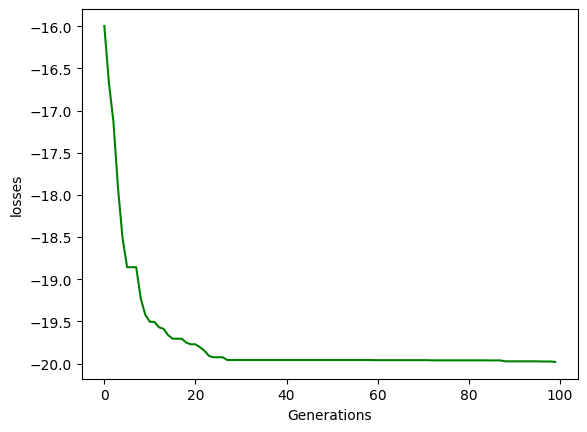

In [100]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  plt.plot(losses_list, c='green')
  plt.xlabel('Generations')
  plt.ylabel('losses')
  plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

# **Bài tập 11**

[4.992675229075218, 4.993242104858277, 4.9945229194245115, 4.999887506967788]


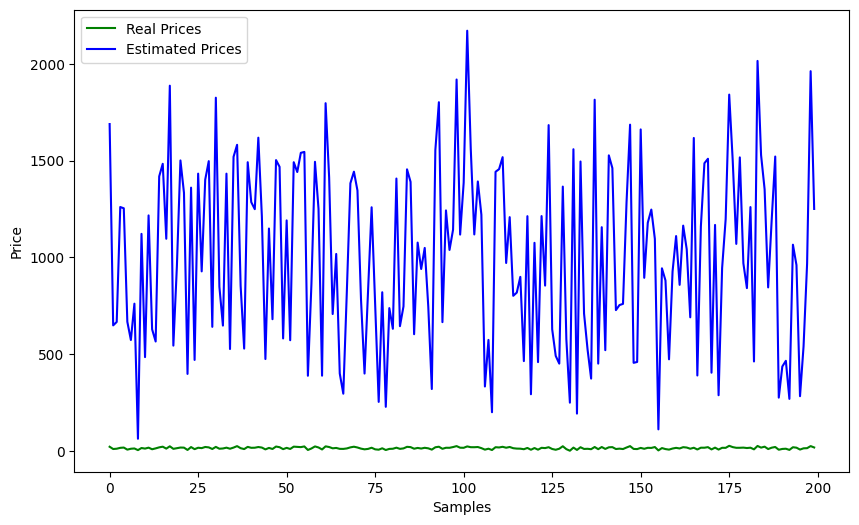

In [101]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
      estimated_price = sum(c*x for x, c in zip(feature, theta))
      estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[4.992675229075218, 4.993242104858277, 4.9945229194245115, 4.999887506967788]


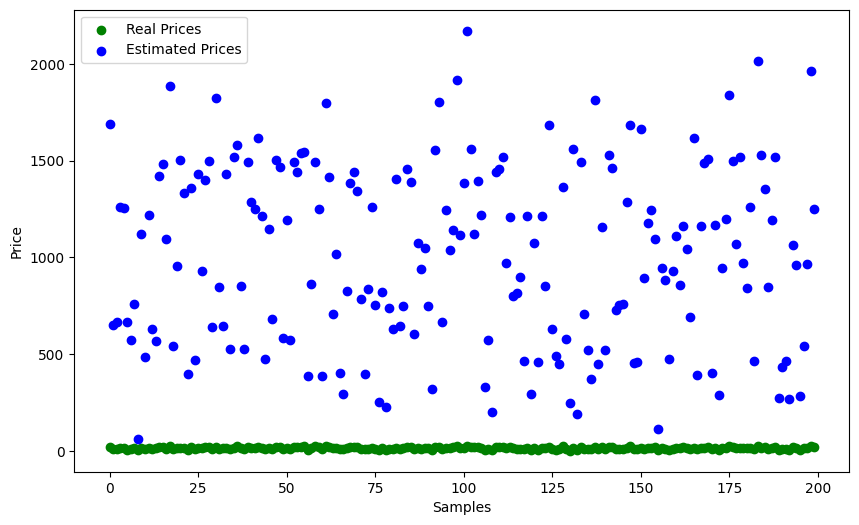

In [102]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()